# Proyek Analisis Data: Bike Sharing
- **Nama:** Nadia Alzena Zahrani
- **Email:** mc006d5x2400@student.devacademy.id
- **ID Dicoding:** mc006d5x2400

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penyewaan sepeda pada setiap bulannya?
- Bagaimana distribusi penyewaan sepeda oleh pengguna terdaftar (*registered*) dan pengguna kasual (*casual*) berdasarkan musim?
- Faktor apa saja yang memengaruhi jumlah penyewaan sepeda secara total (*cnt*) pada penyewaan setiap jamnya?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import zipfile
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
# import dataset dari url drive
url = "https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ"
output = "bike_sharing_dataset.zip"

In [3]:
# Download file dari Google Drive
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/bike_sharing_dataset.zip
100%|██████████| 280k/280k [00:00<00:00, 60.5MB/s]


'bike_sharing_dataset.zip'

In [4]:
# Extract file .zip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("bike_dataset")

In [5]:
# Mengubah dataset menjadi DataFrame
day_df = pd.read_csv('/content/bike_dataset/day.csv')
hour_df = pd.read_csv('/content/bike_dataset/hour.csv')

### Assessing Data

In [6]:
# Menampilkan head dari dataset
print(day_df.head(10))
print(hour_df.head(10))

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.35

In [7]:
# Informasi general dari dataset
print("\nData Harian:")
print(day_df.info())
print("\nData Jam:")
print(hour_df.info())


Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Data Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries

**Insight:**
- **Data Harian (day.csv)**:
Dataset ini terdiri dari 731 entri.
Kolom dteday berformat string dan perlu diubah ke format datetime untuk mendukung analisis berbasis waktu.
Fitur seperti *season, temp, atemp, hum,* dan *windspeed* memberikan informasi relevan yang bisa digunakan untuk memahami faktor-faktor yang memengaruhi total penyewaan sepeda (*cnt*)

- **Data Jam (hour.csv)**:
Memiliki 17.379 entri mencakup data per jam.
Kolom hr menyediakan pergerakan waktu, sehingga analisis tren penyewaan sepeda berdasarkan waktu dalam sehari (jam) dapat dilakukan.

### Identifikasi Outlier

##### Identifikasi Outlier untuk Dataset Day

Statistik Deskriptif Variabel Utama:
              temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.627894    0.190486   848.176471   
std      0.183051    0.162961    0.142429    0.077498   686.622488   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.337083    0.337842    0.520000    0.134950   315.500000   
50%      0.498333    0.486733    0.626667    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.233214  1096.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000  


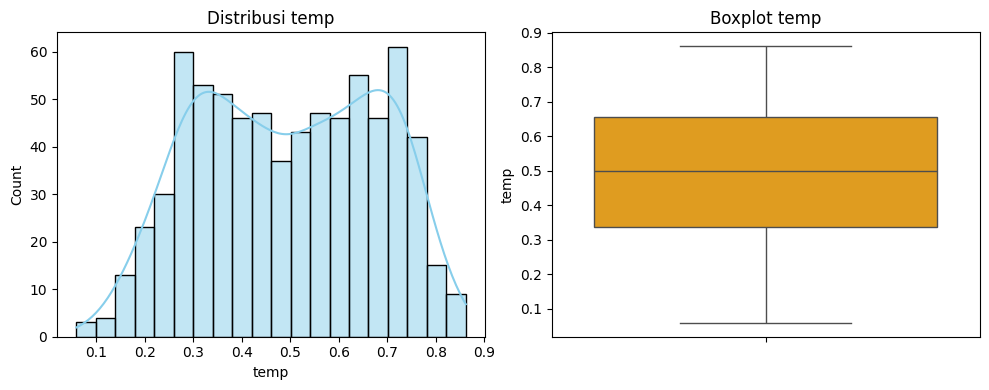

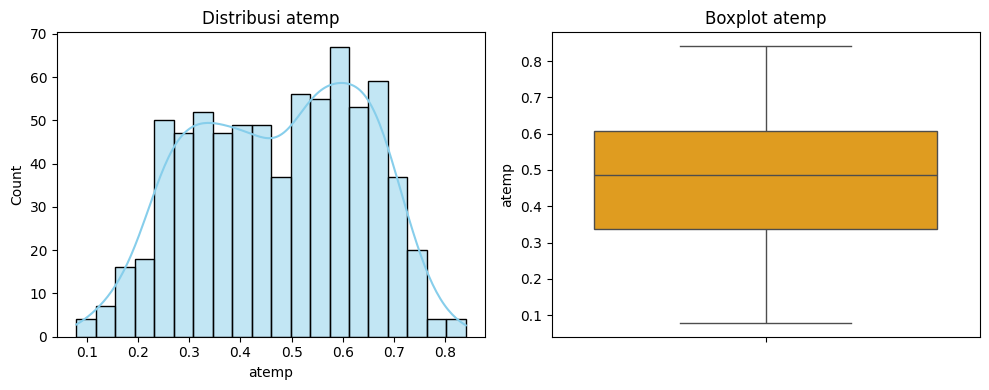

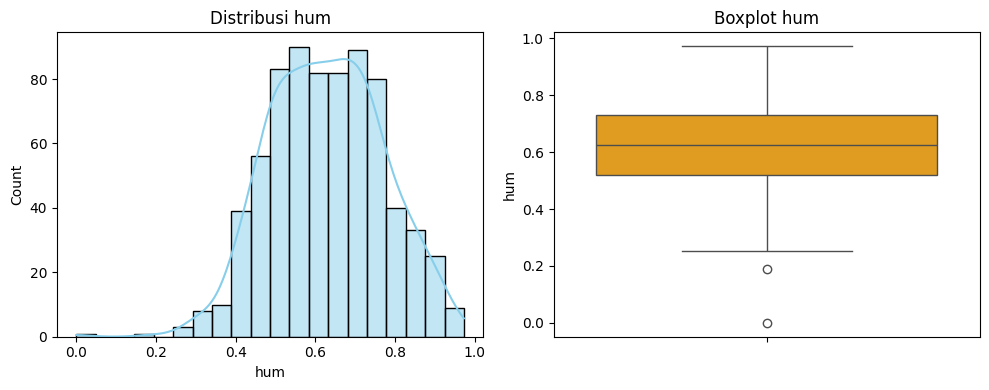

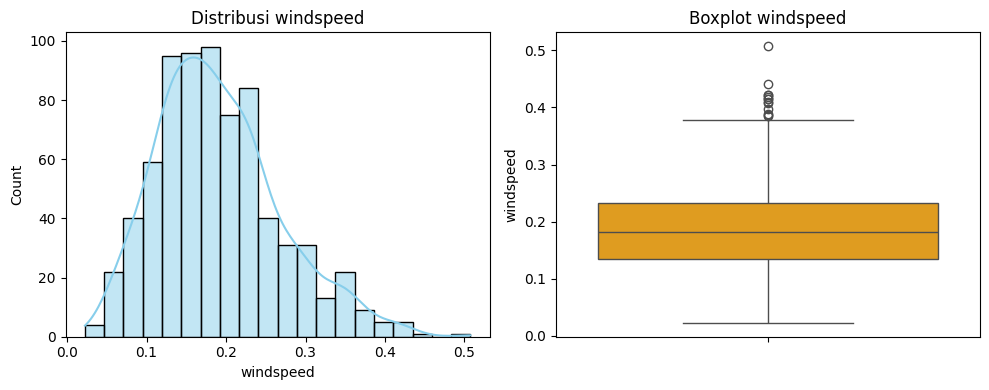

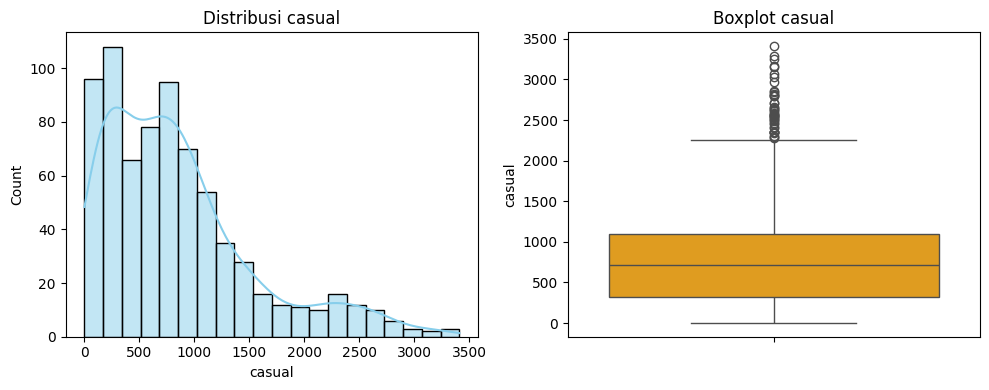

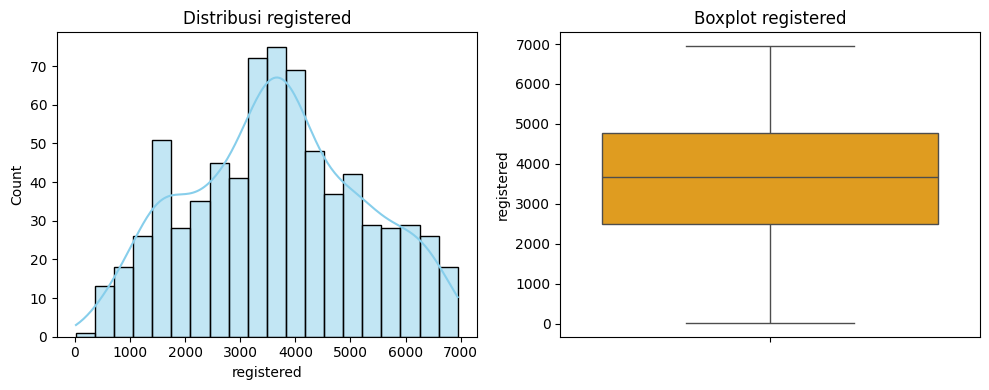

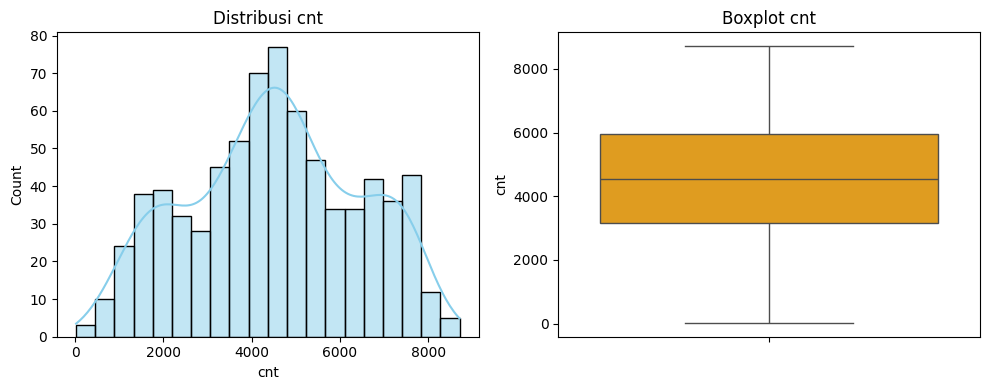

In [8]:
# Statistik deskriptif untuk variabel utama pada Dataset Day
day_desc_stat = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()
print("Statistik Deskriptif Variabel Utama:\n", day_desc_stat)

# Visualisasi distribusi variabel utama Dataset Day
variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for var in variables:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(day_df[var], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribusi {var}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=day_df[var], color='orange')
    plt.title(f"Boxplot {var}")
    plt.tight_layout()

Pada Dataset Day, di variabel *hum, windspeed, casual* terdapat *outlier*  atau nilai yang menyimpang lebih kecil maupun lebih besar dari distribusi datanya, oleh karena itu perlu dilakukan penanganan terhadap outlier. Outlier ini dapat menyebabkan bentuk histogram yang tidak mengikuti sebaran normal terdapat kecenderungan untuk terlalu condong ke arah kiri maupun ke kanan.

##### Identifikasi Outlier untuk Dataset Hours

Statistik Deskriptif Data Jam:
                temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered           cnt  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75% 

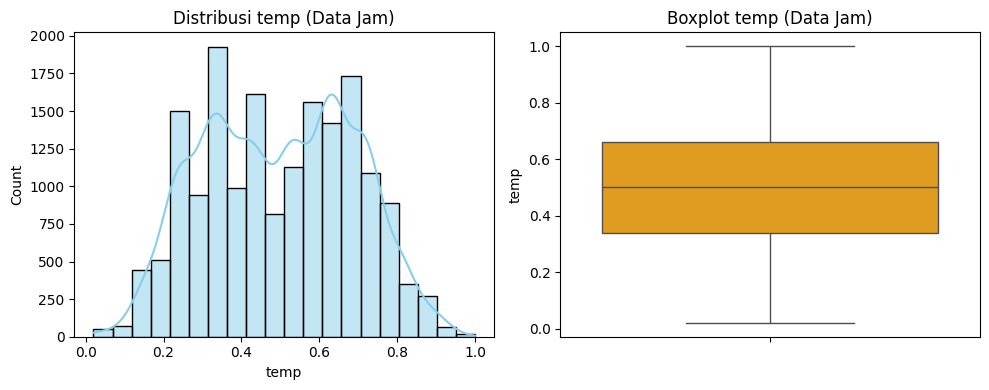

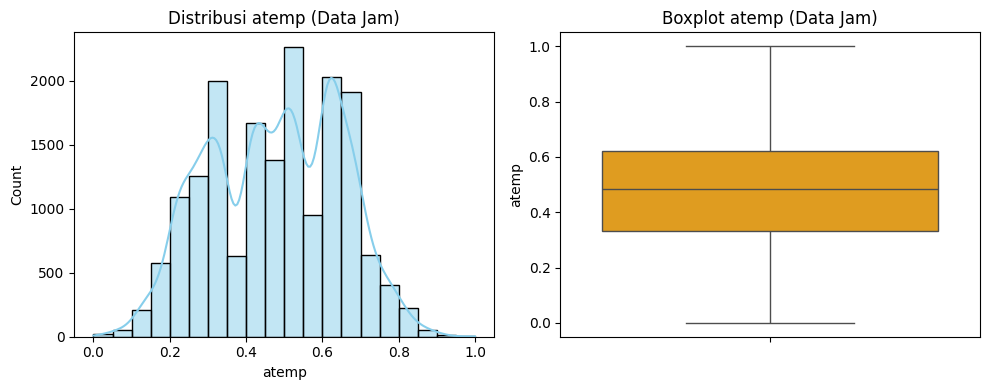

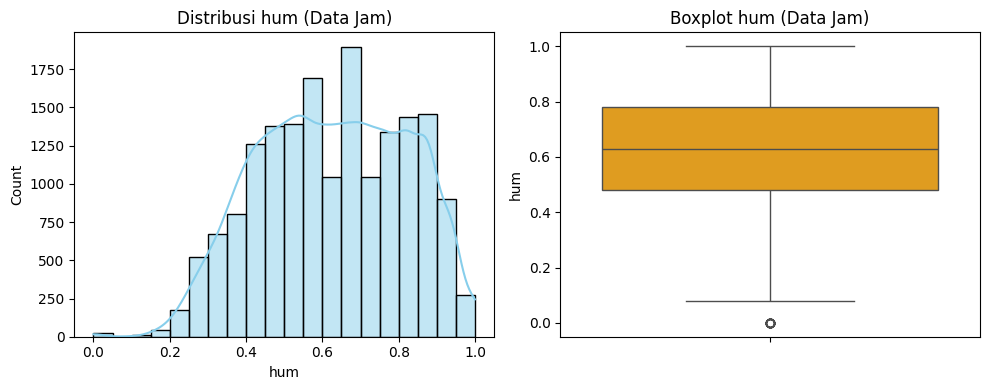

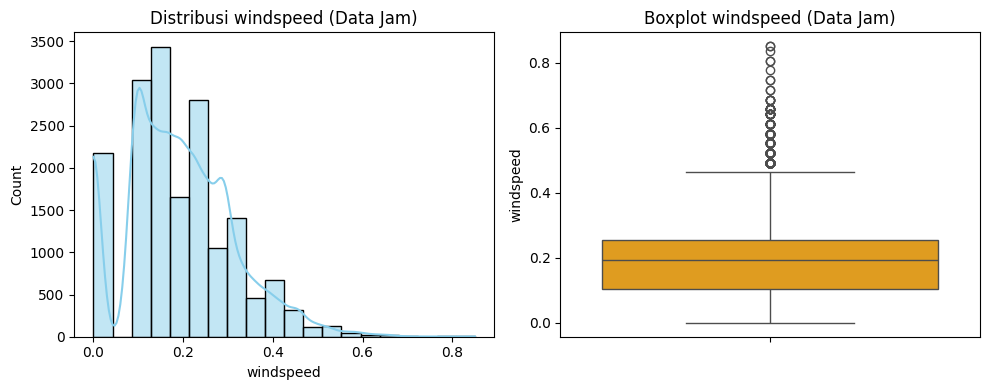

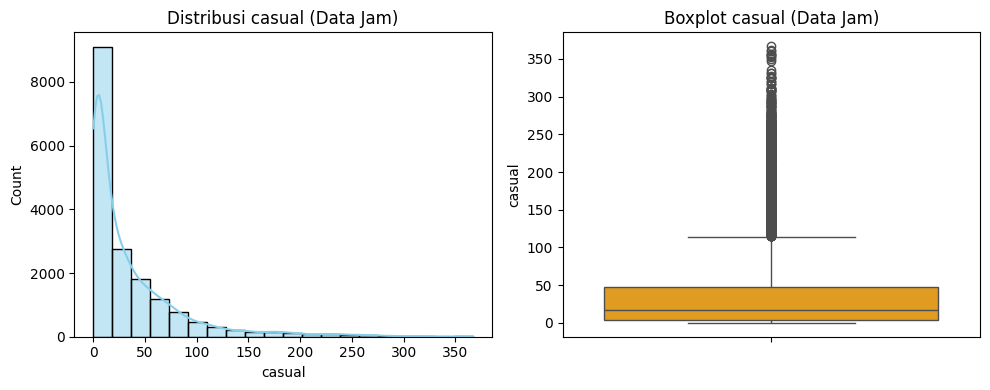

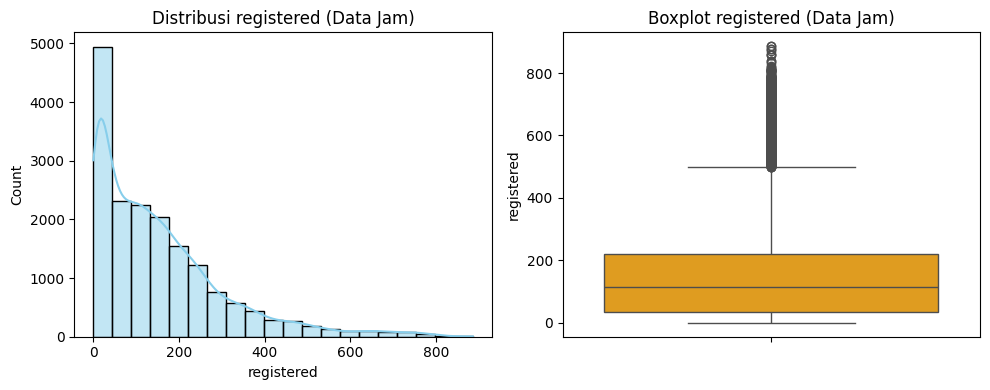

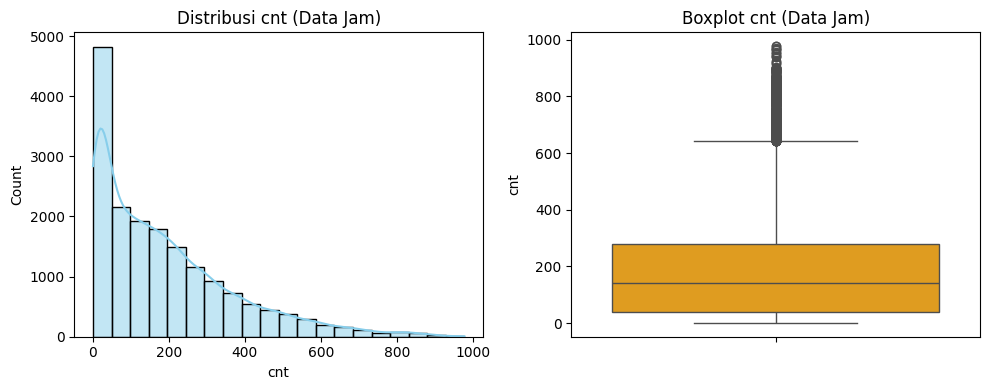

In [9]:
# Statistik deskriptif untuk data jam
hour_desc_stat = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()
print("Statistik Deskriptif Data Jam:\n", hour_desc_stat)

# Visualisasi distribusi variabel utama dalam data jam
hour_variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for var in hour_variables:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(hour_df[var], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribusi {var} (Data Jam)")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=hour_df[var], color='orange')
    plt.title(f"Boxplot {var} (Data Jam)")
    plt.tight_layout()
    plt.show()

Pada Dataset Hours, di variabel h*um, windspeed, casual, registered, dan cnt*  terdapat *outlier* atau nilai yang menyimpang lebih kecil maupun lebih besar dari distribusi datanya, oleh karena itu perlu dilakukan penanganan terhadap outlier. Outlier ini dapat menyebabkan bentuk histogram yang tidak mengikuti sebaran normal.

### Cleaning Data

In [10]:
# Memastikan tidak terdapat missing value
print("\nMissing values dataset Day")
print(day_df.isnull().sum())
print("\nMissing values dataset Hours")
print(hour_df.isnull().sum())


Missing values dataset Day
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values dataset Hours
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ditemukan *missing value* pada kedua dataset.

In [11]:
# Memastikan tidak ada data yang duplikat pada Dataset Day
duplicates = day_df.duplicated()

# Menampilkan jumlah baris yang terduplikasi
print(f"Jumlah baris yang terduplikasi: {duplicates.sum()}")

# Menampilkan baris yang terduplikasi (jika ada)
if duplicates.sum() > 0:
    print("\nBaris yang terduplikasi:")
    print(day_df[duplicates])
else:
    print("\nTidak ada data yang terduplikasi.")


Jumlah baris yang terduplikasi: 0

Tidak ada data yang terduplikasi.


In [12]:
# Memastikan tidak ada data yang duplikat pada Dataset Hours
duplicates = hour_df.duplicated()

# Menampilkan jumlah baris yang terduplikasi
print(f"Jumlah baris yang terduplikasi: {duplicates.sum()}")

# Menampilkan baris yang terduplikasi (jika ada)
if duplicates.sum() > 0:
    print("\nBaris yang terduplikasi:")
    print(day_df[duplicates])
else:
    print("\nTidak ada data yang terduplikasi.")


Jumlah baris yang terduplikasi: 0

Tidak ada data yang terduplikasi.


In [13]:
# Menghapus kolom yang kurang relevan untuk dilakukan analisis data
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

Kolom *instant* dalam dataset tidak digunakan karena sifatnya hanya sebagai nomor indeks atau pengurutan baris. Kolom ini tidak memiliki informasi yang relevan yang dapat membantu menjawab pertanyaan bisnis yang ditargetkan.

In [14]:
# Mengubah kolom dteday menjadi format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [16]:
# Penanganan Outlier

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menandai outlier
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Jumlah outlier pada kolom {column}: {outliers.sum()}")

    # Mengatasi outlier dengan winsorizing
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Menerapkan penanganan outlier pada variabel utama
var_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in var_columns:
    print("\nOutlier dataset Day")
    day_df = handle_outliers(day_df, col)
    print("\nOutlier dataset Hour")
    hour_df = handle_outliers(hour_df, col )

# Memastikan outlier telah ditangani
print("\nStatistik Deskriptif setelah menangani outlier:")
print(day_df[var_columns].describe())


Outlier dataset Day
Jumlah outlier pada kolom temp: 0

Outlier dataset Hour
Jumlah outlier pada kolom temp: 0

Outlier dataset Day
Jumlah outlier pada kolom atemp: 0

Outlier dataset Hour
Jumlah outlier pada kolom atemp: 0

Outlier dataset Day
Jumlah outlier pada kolom hum: 2

Outlier dataset Hour
Jumlah outlier pada kolom hum: 22

Outlier dataset Day
Jumlah outlier pada kolom windspeed: 13

Outlier dataset Hour
Jumlah outlier pada kolom windspeed: 342

Outlier dataset Day
Jumlah outlier pada kolom casual: 44

Outlier dataset Hour
Jumlah outlier pada kolom casual: 1192

Outlier dataset Day
Jumlah outlier pada kolom registered: 0

Outlier dataset Hour
Jumlah outlier pada kolom registered: 680

Outlier dataset Day
Jumlah outlier pada kolom cnt: 0

Outlier dataset Hour
Jumlah outlier pada kolom cnt: 505

Statistik Deskriptif setelah menangani outlier:
             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000  

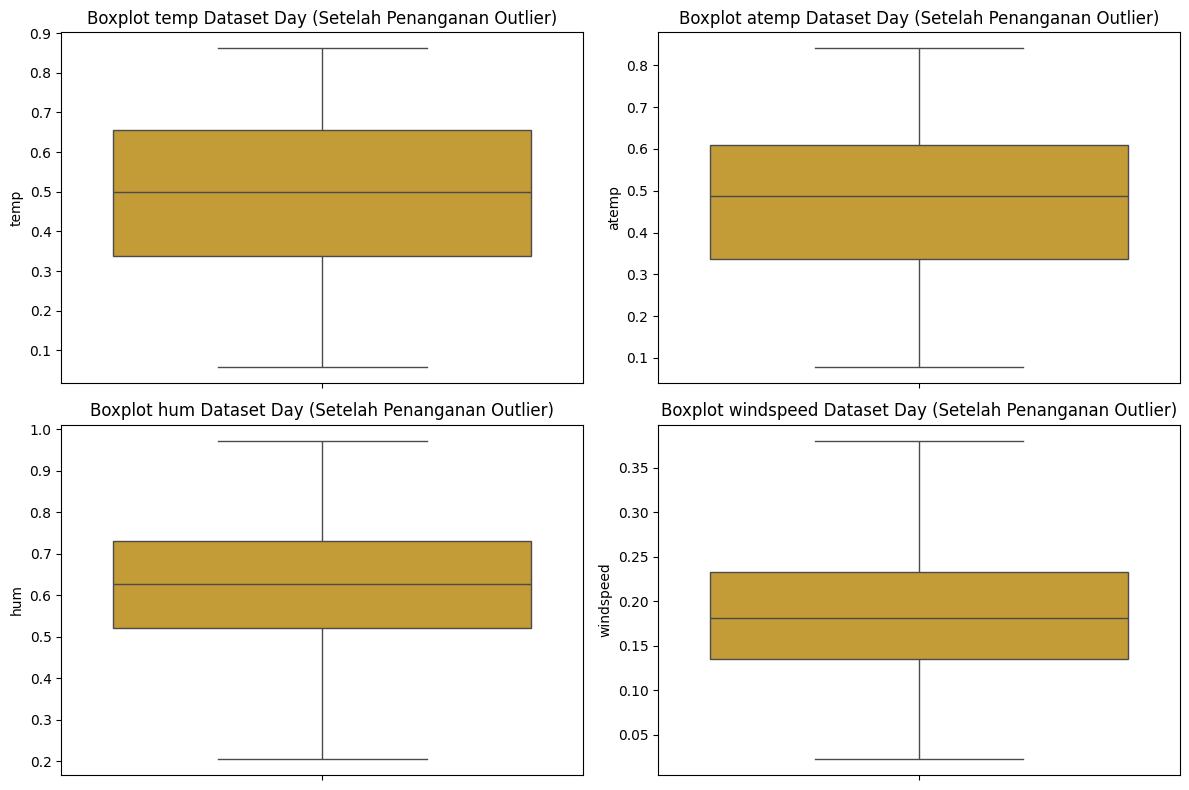

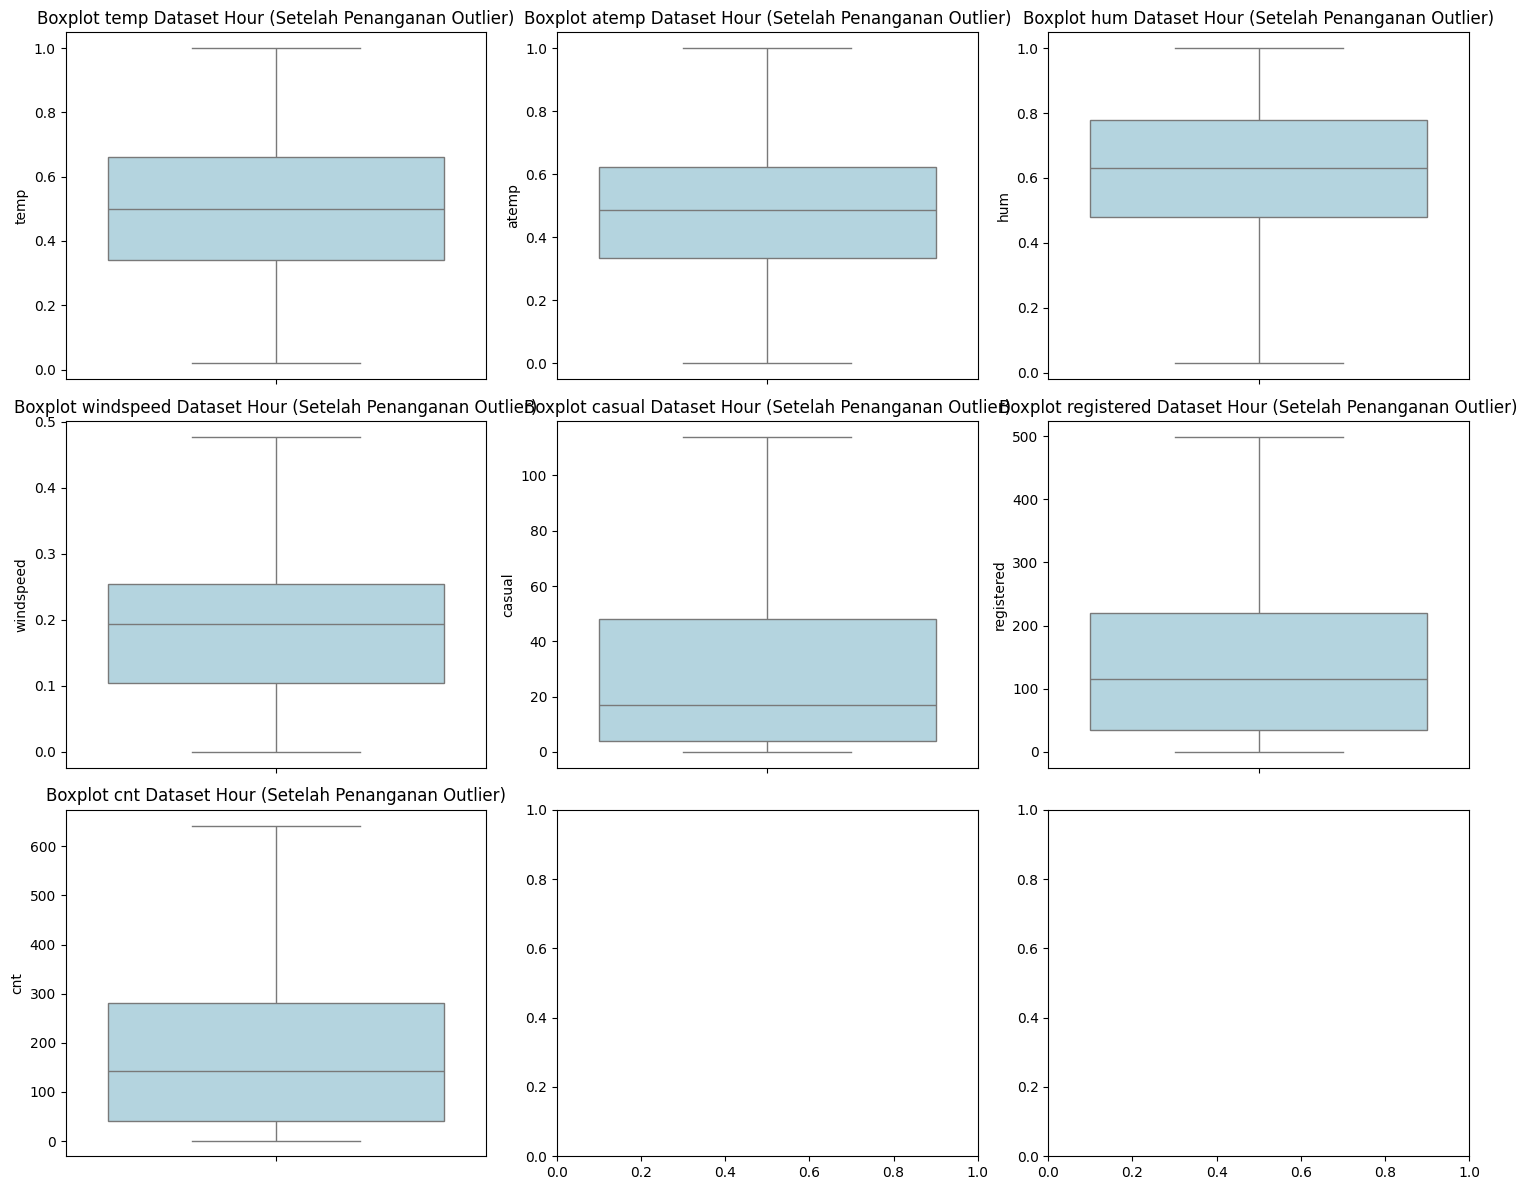

In [29]:
# Boxplot Hasil Penanganan Outlier (Dataset Day)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed']):
    sns.boxplot(data=day_df, y=col, ax=axes[i], color='goldenrod')
    axes[i].set_title(f"Boxplot {col} Dataset Day (Setelah Penanganan Outlier)")

plt.tight_layout()
plt.show()

# Boxplot Hasil Penanganan Outlier (Dataset Hour)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']):
    sns.boxplot(data=hour_df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f"Boxplot {col} Dataset Hour (Setelah Penanganan Outlier)")

plt.tight_layout()
plt.show()

Setelah dilakukan penanganan dengan winsorizing, tidak ditemukan outlier pada data, dengan demikian proses analisis data dapat dilanjutkan.

#### Membuat dataframe baru dari data clean

In [ ]:
day_cleaned = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season', 'dteday', 'mnth', 'weekday', 'weathersit', 'casual', 'registered']].copy()
hour_cleaned = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season', 'dteday', 'mnth', 'weathersit']].copy()

day_cleaned['source'] = 'Day'
hour_cleaned['source'] = 'Hour'

day_cleaned.rename(columns={'cnt': 'cnt_day'}, inplace=True)
hour_cleaned.rename(columns={'cnt': 'cnt_hour'}, inplace=True)

# Menggabungkan kedua dataset secara vertikal
combined_df = pd.concat([day_cleaned, hour_cleaned], ignore_index=True)

# Menambah kolom 'casual' dan 'registered' ke dataset gabungan
combined_df['casual'] = combined_df.apply(lambda row: 0 if row['source'] == 'Day' else row['casual'], axis=1)
combined_df['registered'] = combined_df.apply(lambda row: 0 if row['source'] == 'Day' else row['registered'], axis=1)

print(combined_df.info())
print(combined_df.describe())

## Exploratory Data Analysis (EDA)

#### Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu

In [49]:
#Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
combined_df['weekday'] = combined_df['dteday'].dt.day_name()
weekday_pivot = combined_df.pivot_table(values='cnt_day', index='weekday', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nPivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
print(weekday_pivot)


Pivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu
               cnt_day
weekday               
Monday     4338.123810
Tuesday    4510.663462
Wednesday  4548.538462
Thursday   4667.259615
Friday     4690.288462
Saturday   4550.542857
Sunday     4228.828571


**Insight:**
Dalam satu minggu, hari jumat menjadi hari dengan rata- rata penyewaan sepeda tertinggi daripada hari- hari lainnya dengan rata- rata peminjam sebanyak 4690 pengguna.

#### Penyewa Sepeda Berdasarkan Distribusi Musiman

In [50]:
#Penyewa Sepeda Berdasarkan Distribusi Musiman
combined_df['season_label'] = combined_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_pivot = combined_df.pivot_table(values='cnt_day', index='season_label', aggfunc='mean')
print("\nPivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Musim")
print(season_pivot)


Pivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Musim
                  cnt_day
season_label             
Fall          5644.303191
Spring        2604.132597
Summer        4992.331522
Winter        4728.162921


**Insight**: Musim *fall* atau musim gugur menjadi musim dengan rata- rata penyewa sepeda tertinggi diantara musim- musim lainnya.

#### Distribusi Penyewaan Berdasarkan Cuaca

In [51]:
#Distribusi Penyewaan Berdasarkan Cuaca
weather_pivot = combined_df.pivot_table(values='cnt_hour', index='weathersit', aggfunc='mean')
print("\nPivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
print(weather_pivot)


Pivot Table: Rata-rata Penyewaan Sepeda Berdasarkan Cuaca
              cnt_hour
weathersit            
1           201.057172
2           173.187060
3           110.587033
4            74.333333


Cuaca cerah dan berawan memiliki rata- rata penyewa sepeda terbanyak daripada cuaca lainnya.

#### Distribusi Penyewaan Sepeda Berdasarkan Cuaca dan Musim

In [52]:
#Distribusi Penyewaan Sepeda Berdasarkan Cuaca dan Musim
weather_season_pivot = combined_df.pivot_table(values='cnt_day', index='season_label', columns='weathersit', aggfunc='mean')
print("\nPivot Table: Penyewaan Sepeda Berdasarkan Cuaca dan Musim")
print(weather_season_pivot)


Pivot Table: Penyewaan Sepeda Berdasarkan Cuaca dan Musim
weathersit              1            2        3
season_label                                   
Fall          5878.257353  5222.479167  2751.75
Spring        2811.135135  2357.166667   934.75
Summer        5548.548673  4236.705882  1169.00
Winter        5043.563107  4654.000000  1961.60


- Musim gugur dengan cuaca cerah dan berawan, memiliki rata- rata peminjam sepeda terbanyak di cuaca cerah dan berawan daripada musim lainnya sebesar 5878 pengguna

- Musim gugur dengan cuaca berkabut, memiliki rata- rata peminjam sepeda terbanyak di cuaca cerah dan berawan daripada musim lainnya sebesar 5222 pengguna

- Musim gugur dengan cuaca sedikit bersalju maupun hujan ringan, memiliki rata- rata peminjam sepeda terbanyak di cuaca cerah dan berawan daripada musim lainnya sebesar 2751 pengguna.

- Hasil ini dapat menyimpulkan kebenaran pada eksplorasi sebelumnya jika *fall season* atau musim gugur menjadi musim dengan rata- rata peminjam sepeda terbanyak.

#### Perbandingan Total Penyewaan Berdasarkan Musim

In [53]:
#Perbandingan Total Penyewaan Berdasarkan Musim
season_total_pivot = combined_df.pivot_table(values='cnt_day', index='season_label', aggfunc='sum')
print("\nPivot Table: Total Penyewaan Sepeda Berdasarkan Musim")
print(season_total_pivot)


Pivot Table: Total Penyewaan Sepeda Berdasarkan Musim
                cnt_day
season_label           
Fall          1061129.0
Spring         471348.0
Summer         918589.0
Winter         841613.0


Musim gugur memiliki total penyewaan sepeda terbesar daripada musim- musim lainnya.

#### Distribusi Penyewaan per Jam

In [54]:
#Distribusi Penyewaan per Jam
combined_df['hour'] = combined_df['dteday'].dt.hour
hourly_trend_pivot = combined_df.pivot_table(values='cnt_hour', index='hour', aggfunc='mean')
print("\nPivot Table: Rata-rata Penyewaan Sepeda per Jam")
print(hourly_trend_pivot)


Pivot Table: Rata-rata Penyewaan Sepeda per Jam
        cnt_hour
hour            
0     186.361327


Rata- rata pengunjung menghabiskan waktnya sebanyak 186 jam hingga 187 untuk menggunakan sepedanya.

## Visualization & Explanatory Analysis

### Bagaimana trend penyewaan sepeda pada setiap bulannya?


Pivot Table: Rata-rata Penyewaan Sepeda Bulanan
           cnt_day
month             
1      2176.338710
2      2655.298246
3      3692.258065
4      4484.900000
5      5349.774194
6      5772.366667
7      5563.677419
8      5664.419355
9      5766.516667
10     5199.225806
11     4247.183333
12     3403.806452


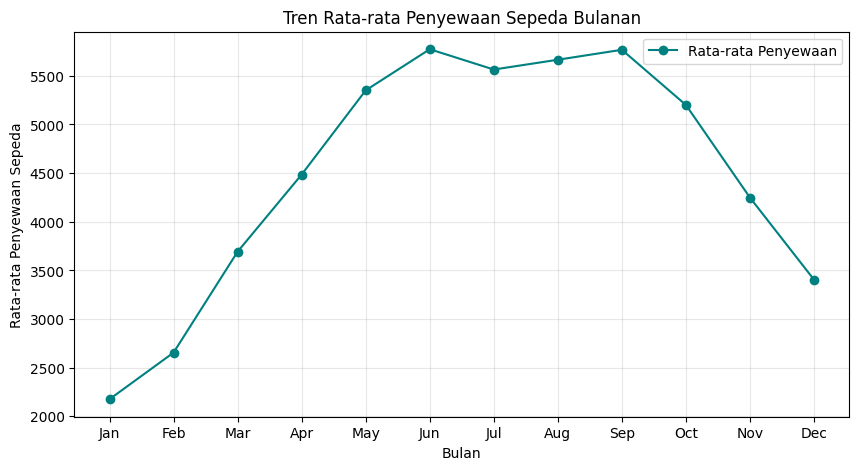

In [55]:
# Visualisasi Tren Waktu
combined_df['month'] = combined_df['dteday'].dt.month
monthly_trend_pivot = combined_df.pivot_table(values='cnt_day', index='month', aggfunc='mean')
print("\nPivot Table: Rata-rata Penyewaan Sepeda Bulanan")
print(monthly_trend_pivot)

plt.figure(figsize=(10, 5))
plt.plot(monthly_trend_pivot.index, monthly_trend_pivot['cnt_day'], marker='o', color='teal', label='Rata-rata Penyewaan')
plt.title("Tren Rata-rata Penyewaan Sepeda Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

### Bagaimana distribusi penyewaan sepeda oleh pengguna terdaftar (registered) dan pengguna kasual (casual) berdasarkan musim?


Pivot Table: Rata-rata Registered dan Casual Berdasarkan Musim
                 casual  registered
season_label                       
Fall          42.814475  170.329206
Spring        12.824553   92.201221
Summer        37.198345  150.613325
Winter        25.712245  155.535147


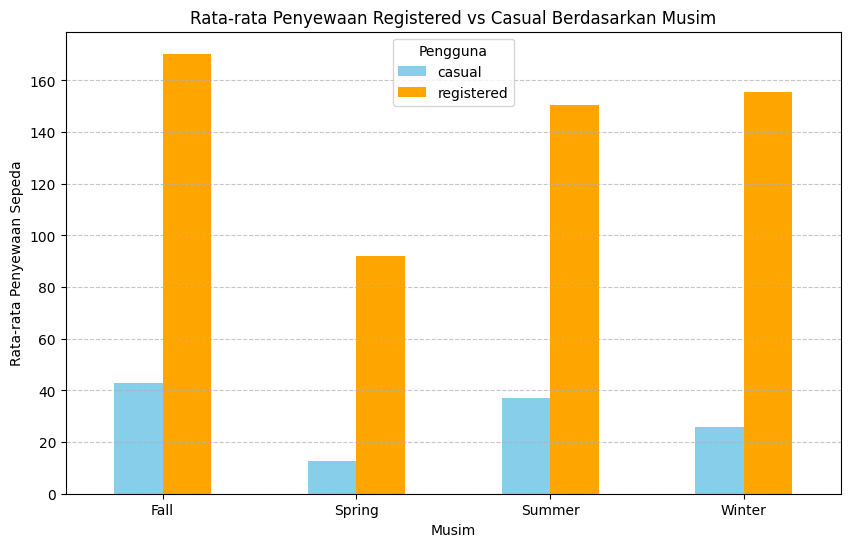

In [56]:
# Pivot Table: Distribusi Registered dan Casual Berdasarkan Musim
registered_casual_season_pivot = combined_df.pivot_table(
    values=['registered', 'casual'],
    index='season_label',
    aggfunc='mean'
)
print("\nPivot Table: Rata-rata Registered dan Casual Berdasarkan Musim")
print(registered_casual_season_pivot)

# Visualisasi Distribusi Registered dan Casual Berdasarkan Musim
registered_casual_season_pivot.plot(
    kind='bar',
    figsize=(10, 6),
    color=['skyblue', 'orange']
)
plt.title("Rata-rata Penyewaan Registered vs Casual Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(rotation=0)
plt.legend(title="Pengguna")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Faktor apa saja yang memengaruhi jumlah penyewaan sepeda secara total (cnt) pada data jam


Matriks Korelasi:
            cnt_hour      temp     atemp       hum  windspeed    casual  \
cnt_hour    1.000000  0.411133  0.407517 -0.329926   0.100906  0.750249   
temp        0.411133  1.000000  0.987819 -0.064381  -0.023567  0.518554   
atemp       0.407517  0.987819  1.000000 -0.046566  -0.062547  0.511464   
hum        -0.329926 -0.064381 -0.046566  1.000000  -0.289697 -0.374241   
windspeed   0.100906 -0.023567 -0.062547 -0.289697   1.000000  0.101013   
casual      0.750249  0.518554  0.511464 -0.374241   0.101013  1.000000   
registered  0.973348  0.334872  0.332476 -0.281718   0.090783  0.625257   

            registered  
cnt_hour      0.973348  
temp          0.334872  
atemp         0.332476  
hum          -0.281718  
windspeed     0.090783  
casual        0.625257  
registered    1.000000  


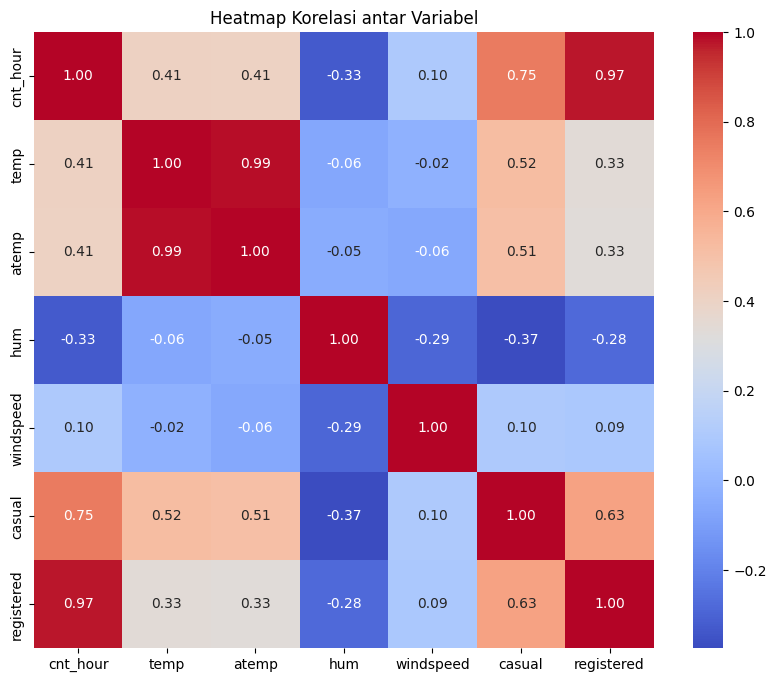

In [58]:
correlation_matrix = combined_df[['cnt_hour' ,'temp', 'atemp', 'hum', 'windspeed','casual','registered']].corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Variabel")
plt.show()

## Analisis Cluster menggunakan Manual Grouping

In [59]:
# Grup Manual Berdasarkan Suhu
def categorize_temp(temp):
    if temp < 0.3:
        return "Dingin"
    elif 0.3 <= temp < 0.7:
        return "Sedang"
    else:
        return "Panas"

# Grup Manual Berdasarkan Kelembapan
def categorize_hum(hum):
    if hum < 0.4:
        return "Rendah"
    elif 0.4 <= hum < 0.7:
        return "Sedang"
    else:
        return "Tinggi"

# Grup Manual Berdasarkan Kecepatan Angin
def categorize_windspeed(windspeed):
    if windspeed < 0.2:
        return "Lambat"
    elif 0.2 <= windspeed < 0.5:
        return "Sedang"
    else:
        return "Cepat"

# Tambahkan Kolom Grup ke Data
combined_df['temp_group'] = combined_df['temp'].apply(categorize_temp)
combined_df['hum_group'] = combined_df['hum'].apply(categorize_hum)
combined_df['windspeed_group'] = combined_df['windspeed'].apply(categorize_windspeed)

# Pivot Table: Analisis Penyewaan Berdasarkan Grup
group_analysis = combined_df.pivot_table(
    values='cnt_day',
    index=['temp_group', 'hum_group', 'windspeed_group'],
    aggfunc='mean'
).sort_values('cnt_day', ascending=False)

print("\nAnalisis Penyewaan Sepeda Berdasarkan Grup:")
print(group_analysis)



Analisis Penyewaan Sepeda Berdasarkan Grup:
                                          cnt_day
temp_group hum_group windspeed_group             
Panas      Sedang    Lambat           5829.915663
           Tinggi    Lambat           5740.923077
Sedang     Sedang    Lambat           5437.114865
           Rendah    Lambat           5412.333333
Panas      Rendah    Lambat           5362.000000
           Sedang    Sedang           5335.666667
           Rendah    Sedang           4968.000000
Sedang     Rendah    Sedang           4960.375000
           Sedang    Sedang           4808.991525
Panas      Tinggi    Sedang           4796.500000
Sedang     Tinggi    Lambat           4655.767241
                     Sedang           3460.880597
Dingin     Sedang    Lambat           2697.696429
           Rendah    Sedang           2508.500000
           Sedang    Sedang           2353.761905
           Tinggi    Lambat           1880.250000
                     Sedang           1601.818182


- Melalui grafik time series, dapat dilihat bila terdapat fluktuasi peminjaman sepeda dalam 1 tahun bulan **juni** menjadi bulan dengan rata- rata peminjam sepeda terbanyak sedangkan bulan **januari** menjadi bulan dengan rata- rata peminjam sepeda paling sedikit, demikian dapat berindikasi pada jenis musim. Bulan Januari memiliki kecenderungan musim salju atau musim dingin, dengan demikian jumlah sepeda pada musim dingin dapat dikurangi mengingat apabila bulan musim dingin dapat menyebabkan kerusakan pada kendaraan dengan membuat korosi dan bulan juni bisa ditambahkan.

- Customer yang telah terdaftar pada musim apapun cenderung lebih banyak meminjam sepeda daripada mereka yang tidak terdaftar. Dapat dilakukan strategi seperti reward loyalti seperti potongan harga sebagai bentuk penghargaan kepada customer yang terdaftar, rewadr ini bisa digunakan juga sebagai sarana promosi untuk customer yang tidak mendaftar agak tergabung.


- Terdapat beberapa faktor yang berhubungan erat dengan jumlah peminjam sepeda, seperti status peminjaman, dan temperatur dari cuaca. Sedangkan kelembapan udara dan kecepatan angin berbanding terbaik dengan jumlah peminjam

- Penyewaan sepeda lebih banyak terjadi pada kondisi suhu panas atau sedang, kelembapan sedang, dan kecepatan angin lambat. Sebaliknya, suhu dingin dengan kelembapan tinggi dan kecepatan angin sedang menyebabkan penurunan drastis dalam penyewaan. Data ini dapat digunakan untuk mengoptimalkan perencanaan penyewaan sepeda, seperti memprediksi permintaan dan menyesuaikan jumlah unit sepeda yang tersedia sesuai dengan kondisi cuaca.